# Storytelling: FireWatch 2024 - Monitorando Incêndios e Seca no Brasil

### Introdução

<img src="https://s2-g1.glbimg.com/my6sLG0fqzOTfN3YGquOE4im_o0=/0x0:2500x1667/1008x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_59edd422c0c84a879bd37670ae4f538a/internal_photos/bs/2022/k/v/vogAEaQ3GlFP18WWoZBA/gp1szphr-.jpg" width="500">


o Brasil enfrenta uma das maiores crises ambientais de sua história, com quase 50.000 focos de incêndio registrados em todo o país. A seca prolongada e os incêndios florestais afetam mais de 10 milhões de pessoas, principalmente nas regiões Norte e Centro-Oeste, onde a falta de chuvas deixou grandes áreas vulneráveis ao fogo. O impacto econômico é devastador, com prejuízos estimados em R$ 2 bilhões devido aos incêndios e à seca.

Esse projeto, baseado em dados do Instituto Nacional de Pesquisas Espaciais (INPE), baseado nos 3 primeiros trimestres do ano(até então), visa monitorar e entender a relação entre a ausência de chuvas, o risco de incêndios e a energia radiativa dos focos de calor (FRP), ajudando a identificar padrões e propor soluções para mitigar essa crise.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregando os datasets na memória
# 1º Trimestre
df_q1 = pd.read_csv('Dataset_FireWatch_Brazil_Q1_2024.csv')
print(f"Tamanho do dataset 1: {df_q1.shape}")

# 2º Trimestre
df_q2 = pd.read_csv('Dataset_FireWatch_Brazil_Q2_2024.csv')
print(f"Tamanho do dataset 2: {df_q2.shape}")

# 3º Trimestre
df_q3 = pd.read_csv('Dataset_FireWatch_Brazil_Q3_2024.csv')
print(f"Tamanho do dataset 3: {df_q3.shape}")

# Concatenando os três trimestres
df_completo = pd.concat([df_q1, df_q2, df_q3], ignore_index=True)

# Verificando o tamanho do dataset final
print(f"\nTamanho do dataset combinado: {df_completo.shape}")

# Visualizando as primeiras linhas do dataset combinado
df_completo.head()

Tamanho do dataset 1: (43753, 8)
Tamanho do dataset 2: (48979, 8)
Tamanho do dataset 3: (78517, 8)

Tamanho do dataset combinado: (171249, 8)


,data,municipio,estado,bioma,avg_numero_dias_sem_chuva,avg_precipitacao,avg_risco_fogo,avg_frp
0,2024-01-01,VALE DO ANARI,RONDÔNIA,Amazônia,0.0,1698.00,0.0,13.00
1,2024-01-01,SÃO GABRIEL DA CACHOEIRA,AMAZONAS,Amazônia,0.2,206.80,0.0,81.40
2,2024-01-01,MANAQUIRI,AMAZONAS,Amazônia,0.0,60.00,0.0,27.00
3,2024-01-01,JUTAÍ,AMAZONAS,Amazônia,2.0,776.00,0.0,211.00
4,2024-01-01,AUTAZES,AMAZONAS,Amazônia,0.0,2.22,0.0,97.67


In [3]:
# Obtendo os tipos de dados do DataFrame completo
typeDados = df_completo.dtypes

# Exibindo cada tipo de dado individualmente com um comentário

# Coluna 'data': (object) — Data da observação.
print(f"data: ({typeDados['data']}) — Data da observação.\n")

# Coluna 'municipio': (object) — Nome do município.
print(f"municipio: ({typeDados['municipio']}) — Nome do município.\n")

# Coluna 'estado': (object) — Estado onde o município está localizado.
print(f"estado: ({typeDados['estado']}) — Estado onde o município está localizado.\n")

# Coluna 'bioma': (object) — Bioma predominante do município (um valor nulo presente).
print(f"bioma: ({typeDados['bioma']}) — Bioma predominante do município (um valor nulo presente).\n")

# Coluna 'avg_numero_dias_sem_chuva': (float64) — Média de dias sem chuva.
print(f"avg_numero_dias_sem_chuva: ({typeDados['avg_numero_dias_sem_chuva']}) — Média de dias sem chuva.\n")

# Coluna 'avg_precipitacao': (float64) — Média de precipitação (em mm).
print(f"avg_precipitacao: ({typeDados['avg_precipitacao']}) — Média de precipitação (em mm).\n")

# Coluna 'avg_risco_fogo': (float64) — Média de risco de fogo.
print(f"avg_risco_fogo: ({typeDados['avg_risco_fogo']}) — Média de risco de fogo.\n")

# Coluna 'avg_frp': (float64) — Média de energia radiativa de fogo (FRP).
print(f"avg_frp: ({typeDados['avg_frp']}) — Média de energia radiativa de fogo (FRP).\n")


data: (object) — Data da observação.

municipio: (object) — Nome do município.

estado: (object) — Estado onde o município está localizado.

bioma: (object) — Bioma predominante do município (um valor nulo presente).

avg_numero_dias_sem_chuva: (float64) — Média de dias sem chuva.

avg_precipitacao: (float64) — Média de precipitação (em mm).

avg_risco_fogo: (float64) — Média de risco de fogo.

avg_frp: (float64) — Média de energia radiativa de fogo (FRP).



bioma       1
avg_frp    89
dtype: int64


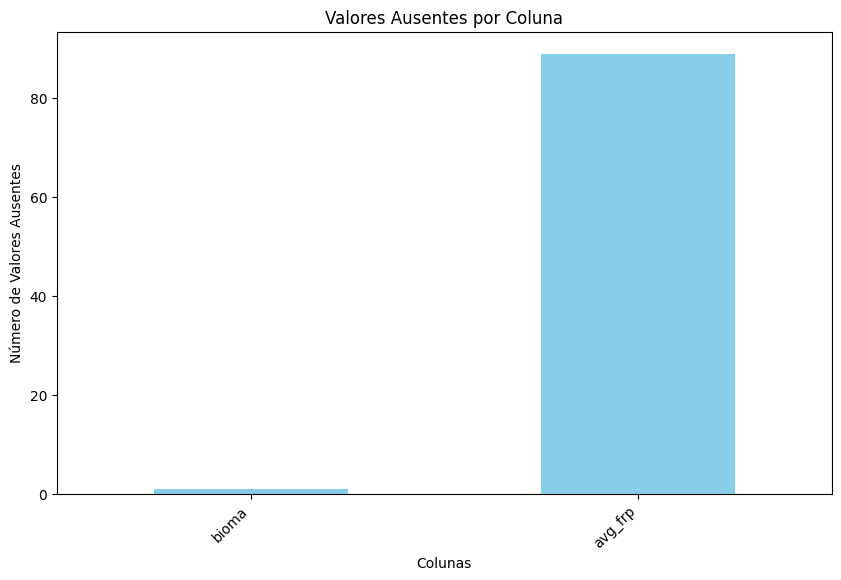

In [4]:
# Verificar valores ausentes 2
missing_data = df_completo.isnull().sum()

# Filtrar colunas com valores ausentes
missing_data = missing_data[missing_data > 0]

# Exibir as colunas com valores ausentes
print(missing_data)

# Gráfico de barras para valores ausentes
plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar', color='skyblue')
plt.title('Valores Ausentes por Coluna')
plt.ylabel('Número de Valores Ausentes')
plt.xlabel('Colunas')
plt.xticks(rotation=45, ha='right')
plt.show()


       avg_numero_dias_sem_chuva  avg_precipitacao  avg_risco_fogo  \
count              171249.000000     171249.000000   171249.000000   
mean                   23.176133        100.829799       55.190840   
std                    30.655699        458.803679       42.796038   
min                     0.000000          0.000000        0.000000   
25%                     2.000000          0.000000        3.500000   
50%                     8.710000          0.000000       66.000000   
75%                    32.750000          0.000000      100.000000   
max                   120.000000      25298.000000      100.000000   

             avg_frp  
count  171160.000000  
mean      117.577072  
std       199.384446  
min         0.000000  
25%        27.287500  
50%        56.000000  
75%       110.500000  
max      9300.570000  


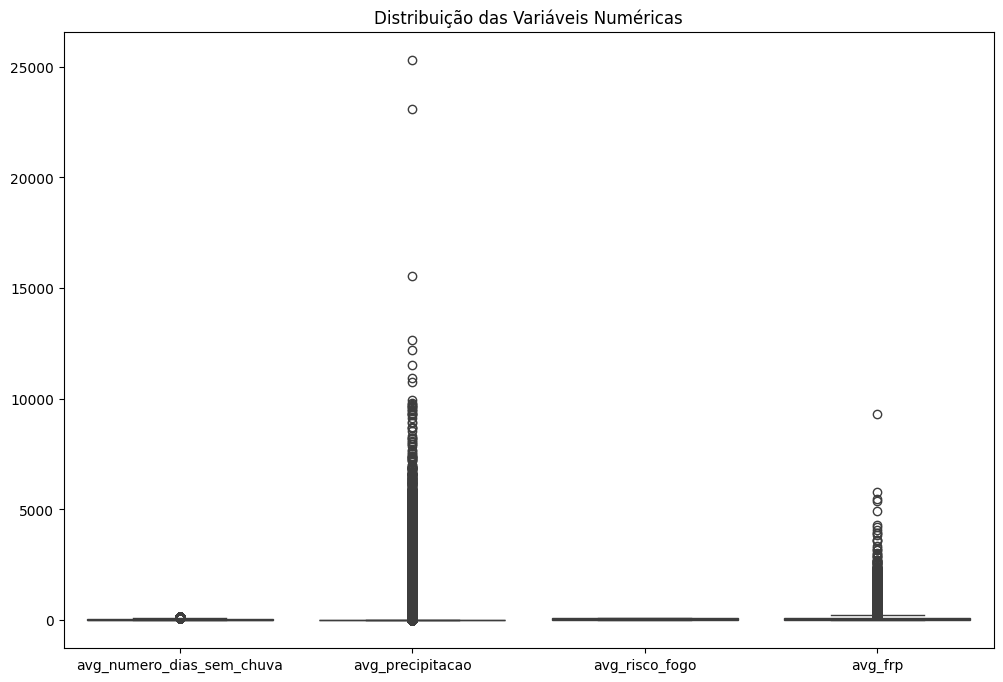

In [5]:
# Estatísticas descritivas básicas 3
stats = df_completo.describe()
print(stats)

# Gráficos de distribuição das variáveis numéricas
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_completo[['avg_numero_dias_sem_chuva', 'avg_precipitacao', 'avg_risco_fogo', 'avg_frp']])
plt.title('Distribuição das Variáveis Numéricas')
plt.show()

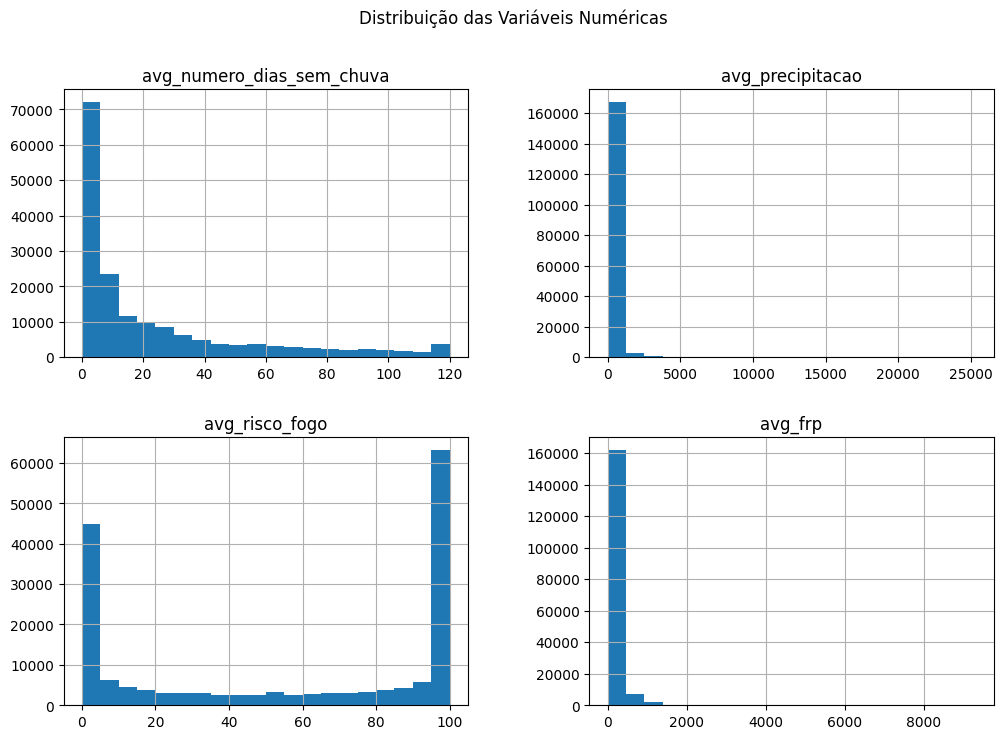

In [6]:
# Histograma das variáveis numéricas 
df_completo[['avg_numero_dias_sem_chuva', 'avg_precipitacao', 'avg_risco_fogo', 'avg_frp']].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribuição das Variáveis Numéricas')
plt.show()


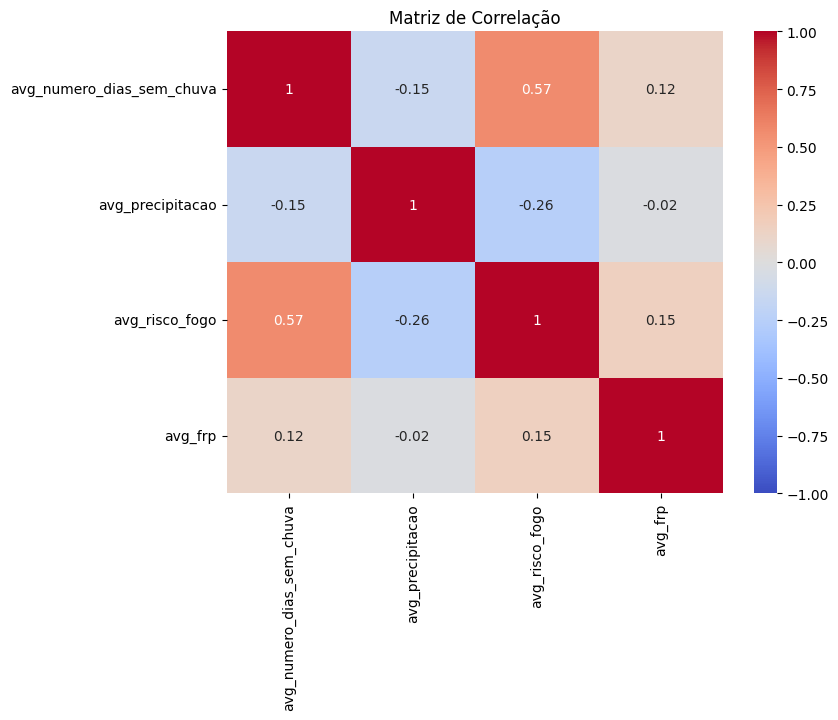

In [7]:
# Matriz de correlação
correlation_matrix = df_completo[['avg_numero_dias_sem_chuva', 'avg_precipitacao', 'avg_risco_fogo', 'avg_frp']].corr()

# Exibir o heatmap de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()


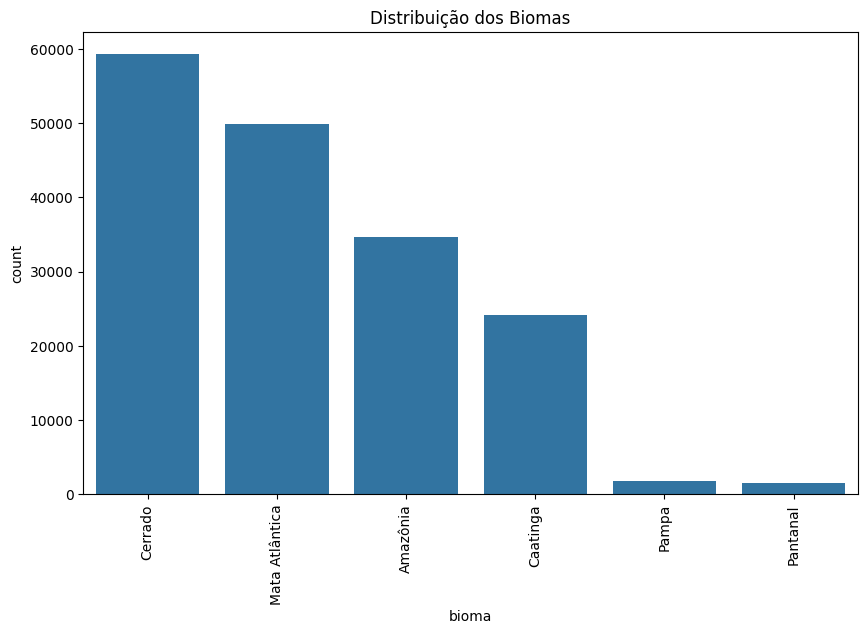

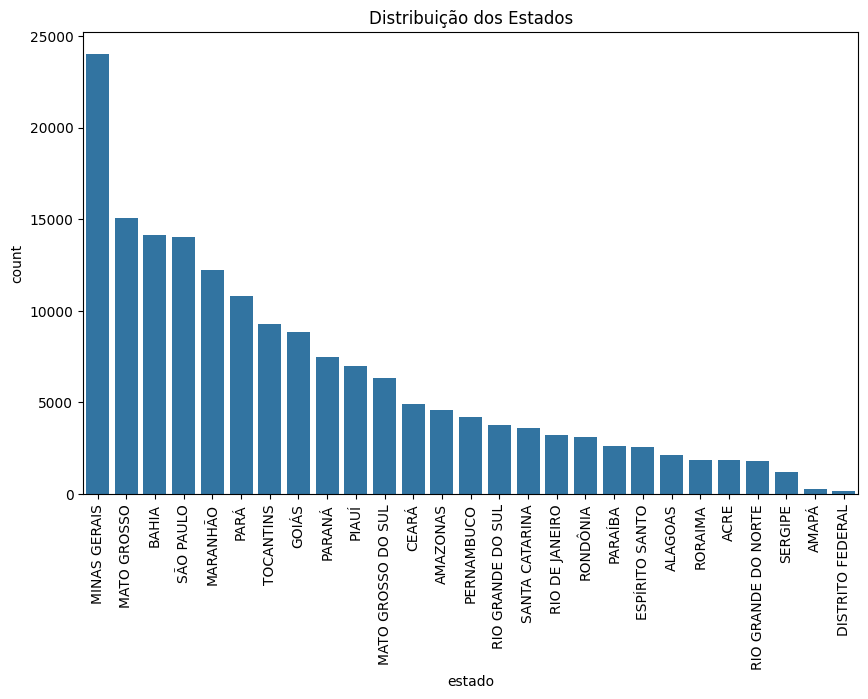

In [8]:
# Gráfico de distribuição por bioma
plt.figure(figsize=(10, 6))
sns.countplot(x='bioma', data=df_completo, order=df_completo['bioma'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribuição dos Biomas')
plt.show()

# Gráfico de distribuição por estado
plt.figure(figsize=(10, 6))
sns.countplot(x='estado', data=df_completo, order=df_completo['estado'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribuição dos Estados')
plt.show()


In [ ]:
#Continuação....